In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/membership-groceries-user-profile/membership_groceries_userprofile.csv


In [2]:
df = pd.read_csv("/kaggle/input/membership-groceries-user-profile/membership_groceries_userprofile.csv")
df.head()

,id,gender,shared_account,membership_tier,membership_auto_renew,membership_fee,membership_start_date,push_notification_enabled,have_app,app_engagement_score,bought_store_brand,promotion_participation_count,average_basket_size,use_count,reward_points_used
0,1,Male,0,standard,1,188,2023/6/25,1,1,84.64,0,2,385.77,14,107
1,2,Female,0,standard,0,188,2019/4/14,1,1,83.78,1,3,126.74,14,149
2,3,Female,0,standard,0,188,2021/10/4,0,0,0.00,0,5,668.71,7,87
3,4,Male,0,standard,1,188,2023/11/22,0,1,51.31,1,2,194.62,12,67
4,5,Female,1,premium,1,388,2019/10/8,1,1,70.82,0,1,519.91,7,120


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             858 non-null    int64  
 1   gender                         858 non-null    object 
 2   shared_account                 858 non-null    int64  
 3   membership_tier                858 non-null    object 
 4   membership_auto_renew          858 non-null    int64  
 5   membership_fee                 858 non-null    int64  
 6   membership_start_date          858 non-null    object 
 7   push_notification_enabled      858 non-null    int64  
 8   have_app                       858 non-null    int64  
 9   app_engagement_score           858 non-null    float64
 10  bought_store_brand             858 non-null    int64  
 11  promotion_participation_count  858 non-null    int64  
 12  average_basket_size            858 non-null    flo

In [4]:
df.isnull().sum()

id                               0
gender                           0
shared_account                   0
membership_tier                  0
membership_auto_renew            0
membership_fee                   0
membership_start_date            0
push_notification_enabled        0
have_app                         0
app_engagement_score             0
bought_store_brand               0
promotion_participation_count    0
average_basket_size              0
use_count                        0
reward_points_used               0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [7]:
df['gender'] = df['gender'].map({"Male" :1, "Female": 0})

In [8]:
df['membership_tier'].unique()

array(['standard', 'premium'], dtype=object)

In [9]:
df['membership_tier'] = df['membership_tier'].map({'standard': 1, 'premium': 0})

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             858 non-null    int64  
 1   gender                         858 non-null    int64  
 2   shared_account                 858 non-null    int64  
 3   membership_tier                858 non-null    int64  
 4   membership_auto_renew          858 non-null    int64  
 5   membership_fee                 858 non-null    int64  
 6   membership_start_date          858 non-null    object 
 7   push_notification_enabled      858 non-null    int64  
 8   have_app                       858 non-null    int64  
 9   app_engagement_score           858 non-null    float64
 10  bought_store_brand             858 non-null    int64  
 11  promotion_participation_count  858 non-null    int64  
 12  average_basket_size            858 non-null    flo

In [11]:
df['membership_start_date'] = pd.to_datetime(df['membership_start_date'], format="%Y/%m/%d")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id                             858 non-null    int64         
 1   gender                         858 non-null    int64         
 2   shared_account                 858 non-null    int64         
 3   membership_tier                858 non-null    int64         
 4   membership_auto_renew          858 non-null    int64         
 5   membership_fee                 858 non-null    int64         
 6   membership_start_date          858 non-null    datetime64[ns]
 7   push_notification_enabled      858 non-null    int64         
 8   have_app                       858 non-null    int64         
 9   app_engagement_score           858 non-null    float64       
 10  bought_store_brand             858 non-null    int64         
 11  promotion_participa

In [12]:
from sklearn.preprocessing import StandardScaler

features_to_scale = [
    'app_engagement_score',
    'promotion_participation_count',
    'average_basket_size',
    'use_count',
    'reward_points_used',
    'membership_fee'
]

scaler = StandardScaler()

df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

df[features_to_scale].head()

,app_engagement_score,promotion_participation_count,average_basket_size,use_count,reward_points_used,membership_fee
0,1.008352,-0.499377,-0.179751,1.041998,0.301803,-0.836068
1,0.981920,0.015606,-1.093545,1.041998,1.196709,-0.836068
2,-1.592965,1.045570,0.818391,-1.661346,-0.124342,-0.836068
3,-0.016009,-0.499377,-0.854081,0.269614,-0.550488,-0.836068
4,0.583609,-1.014359,0.293461,-1.661346,0.578798,1.196075


In [13]:

today = pd.to_datetime("2025-04-09")
df['membership_duration_days'] = (today - df['membership_start_date']).dt.days


df.drop(columns='membership_start_date', inplace=True)


features_to_scale.append('membership_duration_days')

scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])


df[features_to_scale].head()


,app_engagement_score,promotion_participation_count,average_basket_size,use_count,reward_points_used,membership_fee,membership_duration_days
0,1.008352,-0.499377,-0.179751,1.041998,0.301803,-0.836068,-0.462465
1,0.981920,0.015606,-1.093545,1.041998,1.196709,-0.836068,3.100642
2,-1.592965,1.045570,0.818391,-1.661346,-0.124342,-0.836068,0.999501
3,-0.016009,-0.499377,-0.854081,0.269614,-0.550488,-0.836068,-0.811105
4,0.583609,-1.014359,0.293461,-1.661346,0.578798,1.196075,2.689246


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

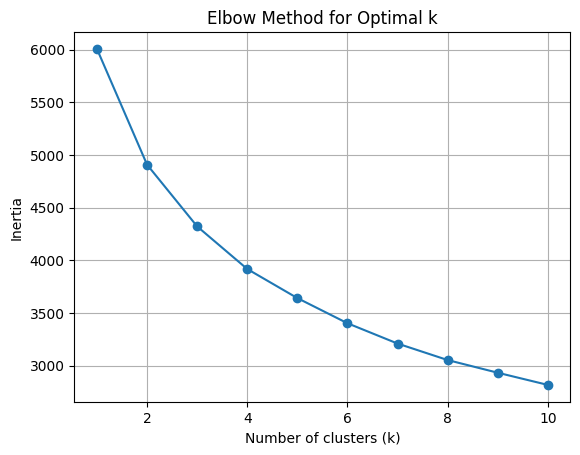

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

inertia = []
k_range = range(1,11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[features_to_scale])
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [15]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['user_cluster'] = kmeans.fit_predict(df[features_to_scale])

df['user_cluster'].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


user_cluster
1    327
3    241
2    235
0     55
Name: count, dtype: int64

In [16]:

cluster_summary = df.groupby('user_cluster')[features_to_scale].mean()
cluster_summary


,app_engagement_score,promotion_participation_count,average_basket_size,use_count,reward_points_used,membership_fee,membership_duration_days
user_cluster,,,,,,,
0,-0.101623,-0.040574,2.906523,-0.032318,-0.085602,0.050685,-0.039448
1,0.583944,0.020330,-0.258982,0.367639,0.414269,-0.836068,-0.005493
2,-1.345356,-0.032606,-0.165068,-0.701618,-0.827210,-0.075095,-0.081878
3,0.542732,0.013469,-0.150957,0.192696,0.264052,1.196075,0.096296


In [17]:
cluster_labels = {
    0: 'Low Engagement',
    1: 'Regular Members',
    2: 'Value Seekers',
    3: 'High Spenders'
}
df['user_segment'] = df['user_cluster'].map(cluster_labels)


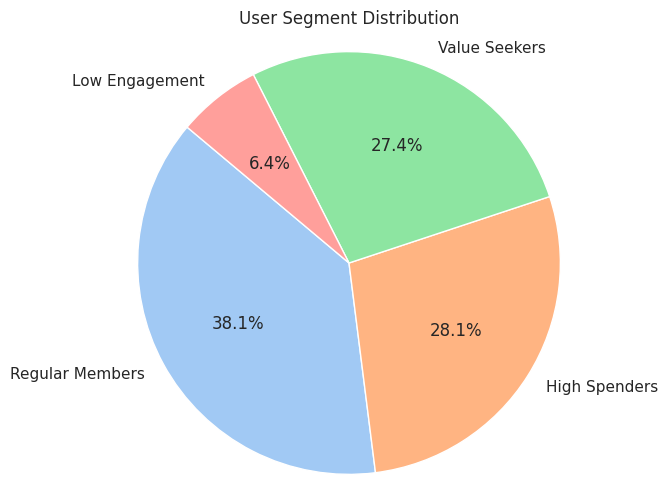

In [18]:
sns.set(style="whitegrid")


segment_counts = df['user_segment'].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(
    segment_counts,
    labels=segment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel')
)
plt.title("User Segment Distribution")
plt.axis('equal')  # Keeps pie chart circular
plt.show()


<Figure size 1400x600 with 0 Axes>

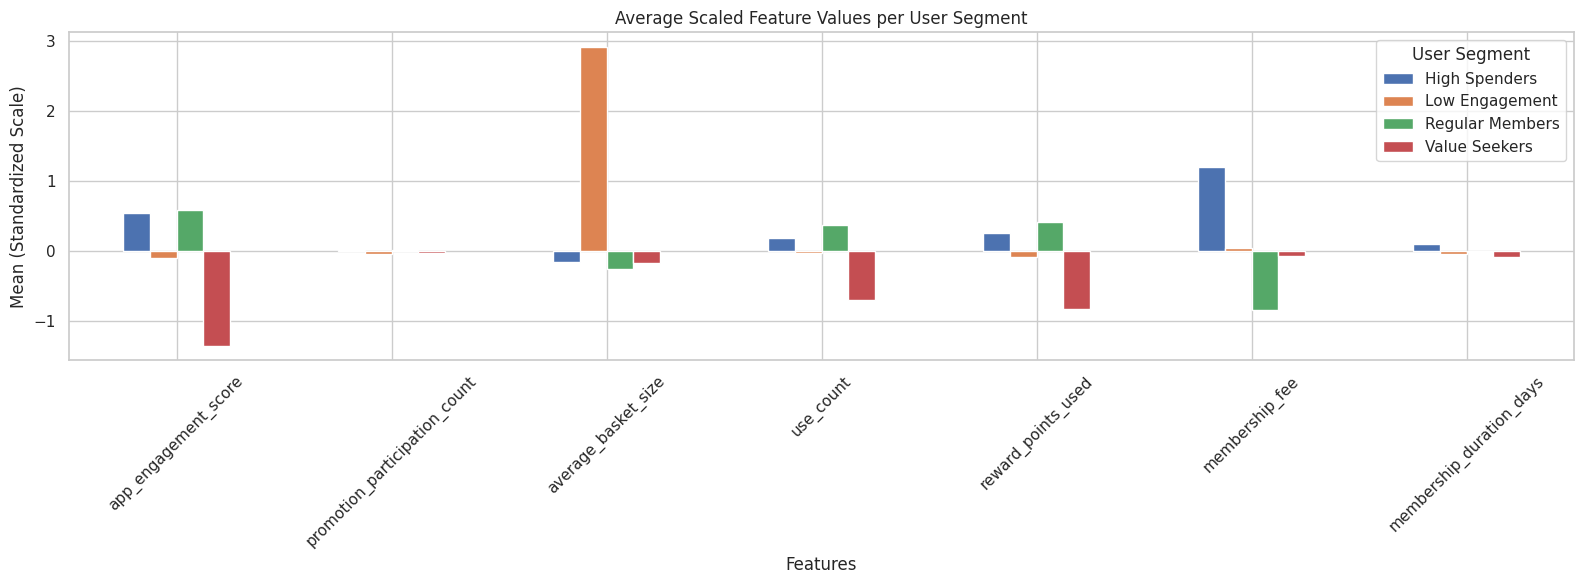

In [19]:

segment_summary = df.groupby('user_segment')[features_to_scale].mean()


plt.figure(figsize=(14, 6))
segment_summary.T.plot(kind='bar', figsize=(16, 6))

plt.title('Average Scaled Feature Values per User Segment')
plt.ylabel('Mean (Standardized Scale)')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.legend(title='User Segment')
plt.tight_layout()
plt.show()


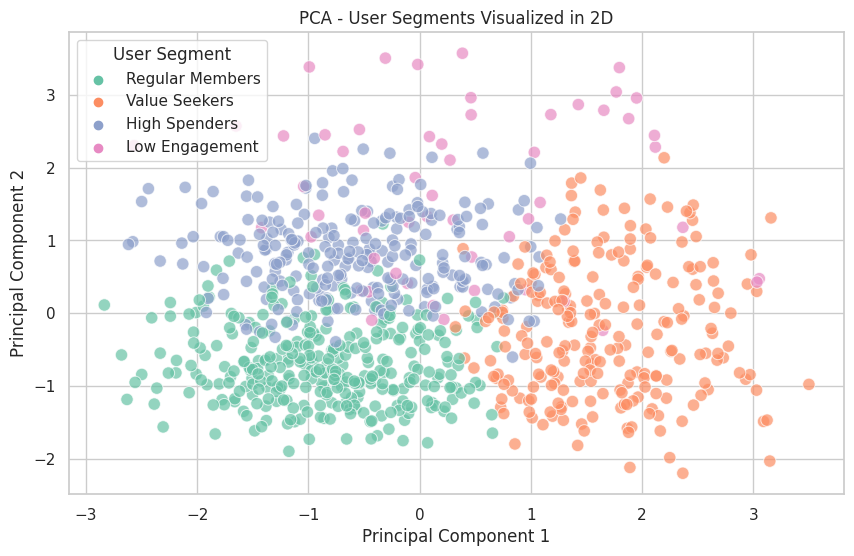

In [20]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
pca_components = pca.fit_transform(df[features_to_scale])


pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['Segment'] = df['user_segment']


plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=pca_df,
    x='PCA1',
    y='PCA2',
    hue='Segment',
    palette='Set2',
    s=80,
    alpha=0.7
)
plt.title('PCA - User Segments Visualized in 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='User Segment')
plt.grid(True)
plt.show()


In [21]:
df.to_csv("membership_user_segments.csv", index=False)
